In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, log_loss

%matplotlib inline

In [2]:
import warnings;
with warnings.catch_warnings():
    warnings.simplefilter("ignore");

In [196]:
train_df = pd.read_json("train.json")

In [197]:
test_df = pd.read_json("test.json")

In [152]:
train_df.shape

(49352, 15)

In [153]:
test_df.shape

(74659, 14)

In [165]:
train_df.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street


features = ['bathrooms','bedrooms', 'price']

let's try to create a new dataframe where number of bath, bedrooms, and price not NULL

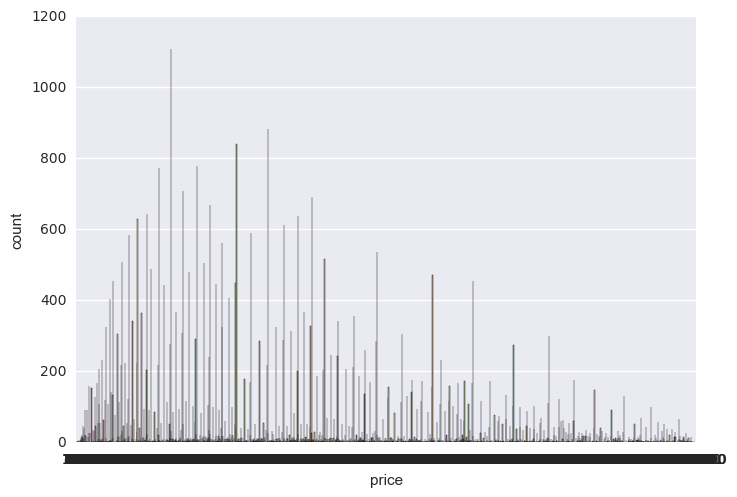

In [144]:
sns.countplot(train_df.price, palette='Set3')

In [155]:
print ("Min: ", train_df.price.min())
print ("Max: ", train_df.price.max())

Min:  43
Max:  4490000


Let's cut off the outliers: 

In [146]:
#train_df = train_df[train_df.price > 500]

In [156]:
train_df.shape

(49352, 15)

In [157]:
my_features = ["bathrooms", "bedrooms", "price"]

In [158]:
x = train_df[my_features]
y = train_df["interest_level"]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [160]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
print('LogisticRegression score: %f' % logistic.score(X_test, y_test))

LogisticRegression score: 0.691115


In [161]:
from sklearn.neighbors import KNeighborsClassifier
neighb = KNeighborsClassifier(5)

In [162]:
neighb.fit(X_train, y_train)
print('KNeighborsClassifier: %f' % neighb.score(X_test, y_test))

KNeighborsClassifier: 0.655050


In [163]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [164]:
tree.fit(X_train, y_train)
print('DecisionTreeClassifier: %f' % tree.score(X_test, y_test))

DecisionTreeClassifier: 0.690508


In [114]:
result = pd.DataFrame(logistic.predict_proba(test_df[my_features]), index=test_df.index, columns=logistic.classes_)
result.head(10)

,high,low,medium
0,0.067940,0.709900,0.222160
1,0.117957,0.576837,0.305206
100,0.029624,0.803409,0.166966
1000,0.077131,0.654264,0.268605
100000,0.016345,0.822529,0.161126
100001,0.000353,0.954682,0.044965
100002,0.123375,0.567500,0.309125
100003,0.116977,0.655159,0.227864
100005,0.102782,0.604014,0.293204
100006,0.080305,0.718618,0.201076


In [115]:
result = pd.concat([result, test_df["listing_id"]], axis=1)
result.head()

,high,low,medium,listing_id
0,0.067940,0.709900,0.222160,7142618
1,0.117957,0.576837,0.305206,7210040
100,0.029624,0.803409,0.166966,7103890
1000,0.077131,0.654264,0.268605,7143442
100000,0.016345,0.822529,0.161126,6860601


In [116]:
cols = ["listing_id", "high", "medium", "low"]

In [117]:
result = result[cols]
result.head()

,listing_id,high,medium,low
0,7142618,0.067940,0.222160,0.709900
1,7210040,0.117957,0.305206,0.576837
100,7103890,0.029624,0.166966,0.803409
1000,7143442,0.077131,0.268605,0.654264
100000,6860601,0.016345,0.161126,0.822529


In [118]:
result.to_csv("etcareva.csv", index=False)

I got the score 0.73590

The number of features can be important, thus, let's crate a new column "number of features"

In [137]:
adr = train_df.display_address.unique()

In [138]:
len(adr)

8826

In [172]:
my_features = ["bathrooms", "bedrooms", "price", "latitude", "longitude"]

In [173]:
x = train_df[my_features]
y = train_df["interest_level"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [174]:
logistic.fit(X_train, y_train)
print('LogisticRegression score: %f' % logistic.score(X_test, y_test))

LogisticRegression score: 0.698511


In [175]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('DecisionTreeClassifier: %f' % tree.score(X_test, y_test))

DecisionTreeClassifier: 0.667106


In [176]:
logistic.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [177]:
result = pd.DataFrame(logistic.predict_proba(test_df[my_features]), index=test_df.index, columns=logistic.classes_)
result = pd.concat([result, test_df["listing_id"]], axis=1)
result.head()

,high,low,medium,listing_id
0,0.065813,0.711832,0.222355,7142618
1,0.119485,0.573335,0.307180,7210040
100,0.030663,0.802540,0.166797,7103890
1000,0.080977,0.649017,0.270007,7143442
100000,0.019591,0.816550,0.163859,6860601


In [178]:
result = result[cols]
result.to_csv("etcareva2.csv", index=False)

reault is the almost the same: 0.73559

In [198]:
train_df['bedrooms'] = train_df['bedrooms']+1
test_df['bedrooms'] = test_df['bedrooms'] + 1

In [193]:
train_df["Value"] = train_df["price"]/train_df['bedrooms']
test_df["Value"] = test_df["price"]/test_df['bedrooms']

In [194]:
my_features = ["bathrooms", "bedrooms", "price", "latitude", "longitude", "Value"]
x = train_df[my_features]
y = train_df["interest_level"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

logistic.fit(X_train, y_train)
print('LogisticRegression score: %f' % logistic.score(X_test, y_test))

LogisticRegression score: 0.696181


In [195]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
print('RandomForestClassifier score: %f' % clf.score(X_test, y_test))

RandomForestClassifier score: 0.701145


In [199]:
def add_features(df):
    df['Value'] = df["price"]/df['bedrooms']
    df['num_photos'] = df['photos'].apply(len)
    df['num_features'] = df['features'].apply(len)
    df['description_size'] = df['description'].apply(lambda x: len(x.split(" ")))
    df['created'] = pd.to_datetime(df['created'])
    df['created_day'] = df['created'].dt.day
    df['created_month'] = df['created'].dt.month
    df['hod'] = df['created'].dt.hour
    df['dow'] = df['created'].dt.dayofweek

In [200]:
add_features(train_df)
add_features(test_df)

In [204]:
my_features = ["bathrooms", "bedrooms", "price", "latitude", 'num_features',"longitude", "Value", 'num_photos', 'description_size', 'hod', 'dow']

In [205]:
x = train_df[my_features]
y = train_df["interest_level"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

logistic.fit(X_train, y_train)
print('LogisticRegression score: %f' % logistic.score(X_test, y_test))

LogisticRegression score: 0.694357


In [206]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
print('RandomForestClassifier score: %f' % clf.score(X_test, y_test))

RandomForestClassifier score: 0.737210


In [207]:
clf.fit(x, y)
result = pd.DataFrame(clf.predict_proba(test_df[my_features]), index=test_df.index, columns=logistic.classes_)
result = pd.concat([result, test_df["listing_id"]], axis=1)
result = result[cols]
result.head(3)

,listing_id,high,medium,low
0,7142618,0.109000,0.436750,0.45425
1,7210040,0.332917,0.399083,0.26800
100,7103890,0.014000,0.133000,0.85300


In [209]:
result.to_csv("etcareva3.csv", index=False)

the result is much better: 0.61973